In [1]:
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

In [2]:
IMAGES_PATH = 'data/images/'

In [3]:
IMAGES_NAME = !ls ../data/images/
IMAGES_NAME

['barcode-00-01.jpg', 'barcode-00-02.jpg']

In [4]:
images = [io.imread('../' + IMAGES_PATH + image_name) for image_name in IMAGES_NAME]

In [6]:
#plt.imshow(image)

In [7]:
images = [np.array(image).mean(axis=2).astype(np.uint8) for image in images]

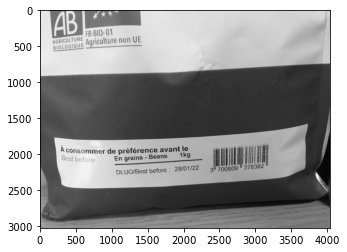

In [10]:
plt.imshow(images[0], cmap='gray')
plt.show()

In [1]:
# Stock all the images in the same list

In [11]:
all_tiles = []
for image in images:
    tiles = []
    n_cols = len(image[0])
    n_rows = len(image)

    for i in range(0, n_rows, 16):
        for j in range(0, n_cols, 16):
            tiles.append(image[i:i+16, j:j+16])
    all_tiles.append(tiles)

In [15]:
index_table = [(0, 2), (1, 2), (2, 2), (2, 1), (2, 0), (1, 0), (0, 0), (0, 1)]
padding_row = np.zeros(18).astype(np.uint8).tolist()

In [157]:
a = 0
b = 13
a = a | int(b > 12) << 1 # 1 sera remplace par i
a

2

In [16]:
def compute_lbp_value(lbp_window):
    lbp_value = 0
    pixel_value = lbp_window[1][1]
    for i in range(8):
        row_index, col_index = index_table[i]
        #print('index value', lbp_window[row_index, col_index])
        lbp_value = lbp_value | (int(lbp_window[row_index][col_index] >= pixel_value) << i)
        #print('lbp_value', lbp_value)
        
    return lbp_value

In [17]:
def pad_tile(tile):
    tileList = tile.tolist()
    
    for i in range(16):
        tileList[i].insert(0, 0)
        tileList[i].append(0)
    tileList.insert(0, padding_row)
    tileList.append(padding_row)    
    return np.array(tileList)

In [18]:
tileTest = pad_tile(tiles[0])

In [161]:
print(tileTest)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0 225 226 228 229 229 228 227 226 229 230 229 228 227 227 228 229   0]
 [  0 225 226 227 228 228 228 228 227 229 230 229 228 227 227 228 229   0]
 [  0 225 226 226 227 227 228 228 228 228 229 230 229 228 228 228 229   0]
 [  0 227 227 227 227 227 228 229 229 228 228 229 228 229 228 229 229   0]
 [  0 227 227 227 227 228 228 229 230 228 228 229 228 228 227 228 228   0]
 [  0 228 227 227 227 228 228 229 230 228 229 229 228 227 227 227 228   0]
 [  0 226 227 227 227 227 228 229 229 229 229 228 227 226 226 227 228   0]
 [  0 226 226 226 227 227 228 228 229 229 229 228 227 226 226 227 228   0]
 [  0 226 226 225 225 225 227 228 229 228 229 228 228 227 227 229 230   0]
 [  0 226 226 226 226 226 227 227 228 229 229 228 227 227 227 228 229   0]
 [  0 226 226 226 226 226 227 227 227 230 229 229 227 227 226 227 228   0]
 [  0 228 228 227 227 227 228 228 228 230 230 229 227 227 226 226 227   0]
 [  0 229 228 227 226 227

In [19]:
compute_lbp_value(tileTest)

2

In [20]:
compute_lbp_value(tileTest[0:3, 0:3])

2

In [21]:
tileTest[1,1]

18

In [45]:
all_histo = []
for tiles in all_tiles:
    histo_list = []
    for tile in tiles:
        padded_tile = pad_tile(tile)
        lbp_histo = [0 for i in range(256)]
    
        for i in range(1, 17):
            for j in range(1, 17):
                window = padded_tile[i-1:i+2, j-1:j+2]
                lbp_histo[compute_lbp_value(window)] += 1    
            
        histo_list.append(lbp_histo / np.max(lbp_histo))
    
    all_histo.append(histo_list)
    

In [46]:
all_histo = np.array(all_histo)
all_histo.shape

(2, 47628, 256)

In [47]:
histo1 = all_histo[0]
histo2 = all_histo[1]

In [48]:
all_histo = all_histo.reshape((-1, 256))

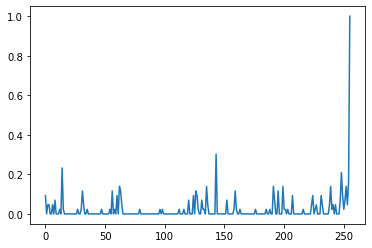

1.0


In [166]:
plt.plot(histo_list[0])
plt.show()
print(np.max(histo_list[0]))

In [28]:
from sklearn.cluster import KMeans

In [168]:
print(len(histo_list) / len(tiles))

1.0


In [169]:
histo = np.array(histo_list)

In [170]:
histo.shape

(47628, 256)

In [171]:
histo[1000]

array([0.06818182, 0.        , 0.        , 0.02272727, 0.        ,
       0.        , 0.        , 0.04545455, 0.02272727, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.04545455,
       0.06818182, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.06818182,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.11363636, 0.09090909, 0.06818182, 0.        , 0.06818182,
       0.        , 0.        , 0.        , 0.        , 0.02272727,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.02272727, 0.        ,
       0.02272727, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.09090909, 0.        , 0.04545455, 0.        ,
       0.04545455, 0.        , 0.22727273, 0.06818182, 0.        ,
       0.        , 0.02272727, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [172]:
# add spatial informations
xx, yy = np.meshgrid(np.arange(image.shape[0] // 16),
                     np.arange(image.shape[1] // 16), indexing="ij")

xx = xx / (image.shape[0] - 1)
yy = yy / (image.shape[1] - 1)

xx.max(), xx.shape


(0.062189877605028115, (189, 252))

In [173]:
histo.shape

(47628, 256)

In [136]:
xx = np.linspace(0, 1, histo.shape[0])
#xx = np.meshgrid(np.arange(histo.shape[0]))
#xx = xx / (histo.shape[0] - 1)
xx.shape

(47628,)

In [174]:
z = histo.reshape(image.shape[0] // 16, image.shape[1] // 16, -1)

In [175]:
#t = np.concatenate((histo, xx[..., np.newaxis]), axis=1)
t = np.concatenate((z, xx[..., np.newaxis], yy[:,:, np.newaxis]), axis=2, dtype=np.float16)

In [176]:
t.shape

(189, 252, 258)

In [64]:
#t = np.concatenate((histo, xx), axis=1, dtype=np.float16)
#t = np.hstack((histo, xx))
t = np.concatenate((histo, xx), axis=0)

ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 2 dimension(s) and the array at index 1 has 1 dimension(s)

In [177]:
t.shape

(189, 252, 258)

In [49]:
n_cluster=16

In [223]:
t = np.reshape(t, (-1, 258))

In [224]:
kmeanst = KMeans(n_clusters=n_cluster, random_state=128).fit(t)

In [50]:
kmeans = KMeans(n_clusters=n_cluster, random_state=128).fit(all_histo)

In [225]:
kmeans = KMeans(n_clusters=n_cluster, random_state=128).fit(histo)

In [226]:
transformedt = kmeanst.predict(t)

In [227]:
transformed = kmeans.predict(histo)

In [73]:
transformed = kmeans.predict(histo1.reshape((-1, 256)))

In [74]:
histo1.shape

(47628, 256)

In [75]:
print(transformed.shape)

(47628,)


In [76]:
transformed_reshape = transformed.reshape(image.shape[0] // 16, image.shape[1] // 16)
#transformedt_reshape = transformedt.reshape(image.shape[0] // 16, image.shape[1] // 16)

In [77]:
transformed_reshape.shape

(189, 252)

In [78]:
print(transformed_reshape)

[[ 1  1  1 ...  9 12  4]
 [12  1  1 ...  9  4  4]
 [12  1 12 ...  9 12  4]
 ...
 [ 6 15  6 ...  2  2 10]
 [ 2  5  5 ...  6  6  6]
 [ 6  6 15 ... 14  0  4]]


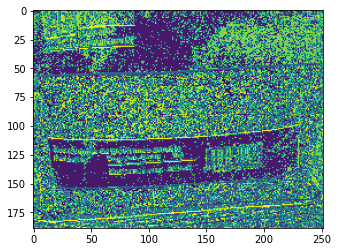

In [79]:
plt.imshow(transformed_reshape)

In [80]:
import matplotlib.cm as cm


In [81]:
def random_lut(n_values):
    '''Build a random LUT for `n_values` elements (sequential integers).'''
    samples = np.linspace(0, 1, n_values)  # take n_values values between 0 and 1 (evenly spaced)
    rng = np.random.default_rng(3)  # get a RNG with a specific seed
    samples = rng.permutation(samples)  # shuffle our values
    colors = cm.hsv(samples, alpha=None, bytes=True)  # get corresponding colors from the HSV color map
    return colors[...,:3]  # remove alpha channel and return

In [82]:
lut = random_lut(n_cluster)

In [83]:
lut

array([[ 84,   0, 255],
       [255,   0,  23],
       [  0, 116, 255],
       [255, 100,   0],
       [184,   0, 255],
       [255, 200,   0],
       [255,   0, 124],
       [  0,  15, 255],
       [255,   0,   0],
       [108, 255,   0],
       [  0, 255, 192],
       [  0, 255,  92],
       [255,   0, 224],
       [  7, 255,   0],
       [208, 255,   0],
       [  0, 216, 255]], dtype=uint8)

In [84]:
recolored = lut[transformed_reshape]
#recoloredt = lut[transformedt_reshape]
recolored.shape

(189, 252, 3)

In [85]:
def show_image_seg(img, recolored, n_clusters):
    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    plt.imshow(img)
    plt.title("Original image")
    plt.subplot(1,2,2)
    plt.imshow(recolored)
    plt.title(f"Segmented areas (with spatial info), {n_clusters} clusters")

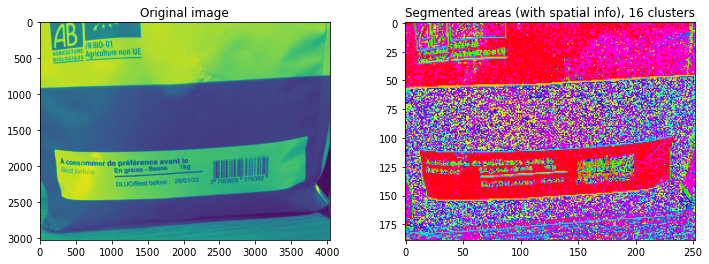

In [86]:
show_image_seg(images[0], recolored, n_cluster)

In [140]:
kmeans.cluster_centers_.shape

(16, 256)

In [141]:
transformed.shape

(47628,)

In [186]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=16, metric="euclidean")
neigh.fit(histo, transformed)


KNeighborsClassifier(metric='euclidean', n_neighbors=16)

In [187]:
neigh_prediction = neigh.predict(histo)

In [188]:
neigh_prediction.shape

(47628,)

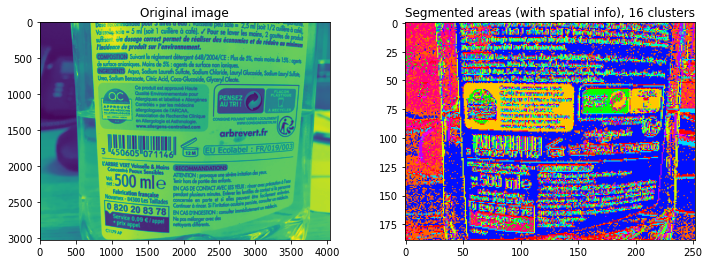

In [189]:
neighbor_recolored = lut[neigh_prediction.reshape(image.shape[0] // 16, image.shape[1] // 16)]


show_image_seg(image, neighbor_recolored, n_cluster)

In [146]:
from sklearn.neighbors import NearestCentroid
search_engine = NearestCentroid();
# Fit sur ton tableau d'histogramme
search_engine.fit(histo, transformed);
#distance, results = search_engine.kneighbors(histo, n_neighbors=16);

neighbor_prediction = search_engine.predict(histo)

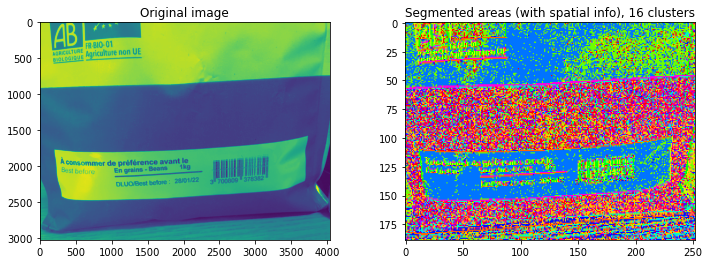

In [147]:
neighbor_recolored = lut[neighbor_prediction.reshape(image.shape[0] // 16, image.shape[1] // 16)]


show_image_seg(image, neighbor_recolored, n_cluster)

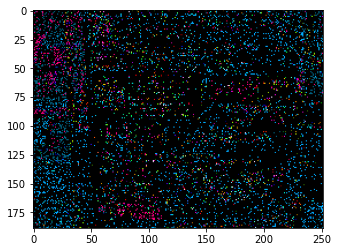

In [190]:
diff = neighbor_recolored - recolored
plt.imshow(diff, cmap='gray')

In [219]:
print(results.shape)

(47628, 16)


In [220]:
results

array([[    0, 30699, 10350, ..., 28237, 10232,  2650],
       [    1, 13442,   539, ..., 30119, 29539, 12112],
       [    2, 10586, 36965, ...,  2619,  2477, 10006],
       ...,
       [47625, 41200, 19471, ..., 21006, 43668, 24658],
       [47626, 43685, 42745, ..., 39052,  7072, 16257],
       [47627, 41743, 46795, ..., 25345,  1727, 46091]])

In [221]:
distance

array([[ 0.        ,  3.74165739,  4.        , ...,  6.32455532,
         6.32455532,  6.32455532],
       [ 0.        ,  7.07106781,  7.34846923, ...,  8.24621125,
         8.24621125,  8.36660027],
       [ 0.        ,  8.24621125,  8.94427191, ..., 11.3137085 ,
        11.40175425, 11.48912529],
       ...,
       [ 0.        ,  3.74165739,  4.        , ...,  5.47722558,
         5.47722558,  5.47722558],
       [ 0.        ,  5.83095189,  6.63324958, ...,  9.59166305,
         9.59166305,  9.69535971],
       [ 0.        ,  3.74165739,  4.        , ...,  5.47722558,
         5.47722558,  5.65685425]])

In [192]:
from sklearn.neighbors import NearestNeighbors
search_engine = NearestNeighbors();
# Fit sur ton tableau d'histogramme
search_engine.fit(histo);
distance, results = search_engine.kneighbors(histo, n_neighbors=16);

In [195]:
distance.shape, results.shape, histo.shape

((47628, 16), (47628, 16), (47628, 256))

In [197]:
print(distance[0])
print(results[0])

[0.         0.84037652 0.84247828 0.84599431 0.85038533 0.85082172
 0.85403738 0.85640972 0.86182862 0.8662475  0.86761192 0.8676177
 0.87406532 0.87423772 0.87639734 0.87714912]
[    0 16648  6051 12617   515 45459 17411 17390  4555  1268 32021  3044
  2274 17645  5810   763]


In [198]:
histo[16648]

array([0.55, 0.05, 0.25, 0.2 , 0.  , 0.  , 0.05, 0.15, 0.15, 0.  , 0.05,
       0.05, 0.05, 0.  , 0.25, 0.15, 0.05, 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.05, 0.  , 0.2 , 0.  , 0.  , 0.05, 0.1 , 0.  , 0.25, 0.2 , 0.35,
       0.  , 0.05, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.15, 0.05, 0.  , 0.1 , 0.  , 0.  , 0.  ,
       0.  , 0.3 , 0.  , 0.1 , 0.  , 0.05, 0.  , 0.15, 0.2 , 0.  , 0.  ,
       0.05, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.1 , 0.  , 0.  ,
       0.1 , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.05, 0.05, 0.05, 0.05, 0.  , 0.  , 0.  , 0.  , 0.05, 0.  , 0.15,
       0.  , 0.  , 0.  , 0.1 , 0.  , 0.2 , 0.05, 0.3 , 0.15, 0.  , 0.3 ,
       0.  , 0.  , 0.  , 0.1 , 0.  , 0.  , 0.  , 0.  , 0.05, 0.  , 0.05,
       0.3 , 0.  , 0.  , 0.  , 0.15, 0.  , 0.  , 0.

In [199]:
histo[0]

array([0.68421053, 0.05263158, 0.26315789, 0.05263158, 0.05263158,
       0.        , 0.10526316, 0.05263158, 0.15789474, 0.        ,
       0.        , 0.        , 0.10526316, 0.05263158, 0.10526316,
       0.05263158, 0.05263158, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.05263158, 0.10526316,
       0.        , 0.05263158, 0.        , 0.05263158, 0.        ,
       0.21052632, 0.15789474, 0.52631579, 0.        , 0.10526316,
       0.        , 0.05263158, 0.        , 0.05263158, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.05263158,
       0.        , 0.        , 0.        , 0.10526316, 0.        ,
       0.        , 0.        , 0.10526316, 0.        , 0.05263158,
       0.        , 0.31578947, 0.05263158, 0.05263158, 0.        ,
       0.10526316, 0.10526316, 0.26315789, 0.15789474, 0.05263158,
       0.        , 0.05263158, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.05263158, 0.        , 0.     

In [201]:
kmeans.cluster_centers_.shape

(16, 256)

In [202]:
from sklearn_extra.cluster import KMedoids

ModuleNotFoundError: No module named 'sklearn_extra'